# ⚛️ H₂ — Ground-State VQE vs Bond Length (Noiseless, UCCSD)

This notebook performs a **bond-length scan** for the hydrogen molecule **H₂**
using the production VQE API:

```python
from vqe.core import run_vqe_geometry_scan
```

We study how the **ground-state energy** varies as a function of the H–H bond
distance using a **UCCSD** ansatz (singles + doubles), which is your canonical
chemistry ansatz for H₂.

---

## Simulation setup

- Molecule: **H₂**
- Geometry: H–H bond length scan
- Distances: **0.5 Å → 2.5 Å** (21 points)
- Basis: **STO-3G**
- Ansatz: **UCCSD**
- Optimizer: **Adam**
- Device: `default.qubit`
- Noise: **None** (noiseless)

All heavy lifting (Hamiltonian construction, ansatz building, optimisation loop,
caching, and plotting) is handled entirely by the package.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Allow local import when running from notebooks/
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from vqe.core import run_vqe_geometry_scan
from vqe_qpe_common.molecule_viz import plot_molecule


# 🧬 Bond-Length Grid

We define a simple one-dimensional scan over the H–H bond length.

In [7]:
# H–H bond lengths in Ångström
bond_lengths = np.linspace(0.25, 2.50, 51)
print("Bond-length grid (Å):", bond_lengths)

Bond-length grid (Å): [0.25  0.295 0.34  0.385 0.43  0.475 0.52  0.565 0.61  0.655 0.7   0.745
 0.79  0.835 0.88  0.925 0.97  1.015 1.06  1.105 1.15  1.195 1.24  1.285
 1.33  1.375 1.42  1.465 1.51  1.555 1.6   1.645 1.69  1.735 1.78  1.825
 1.87  1.915 1.96  2.005 2.05  2.095 2.14  2.185 2.23  2.275 2.32  2.365
 2.41  2.455 2.5  ]


# 🚀 Run Geometry Scan via `run_vqe_geometry_scan`

`run_vqe_geometry_scan`:

- Uses the internal H₂ bond-length geometry helper (via `molecule="H2_BOND"`)
- Calls `run_vqe` under the hood for each bond length
- Reuses cached runs when available
- Produces a **Ground-state energy vs bond length** plot and saves it to disk

We use:
- Ansatz: **UCCSD**
- Optimizer: **Adam**
- Single seed: `0`
- 30 optimisation steps per geometry


⚙️ Geometry: bond = 0.250

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_BOND__UCCSD__Adam__VQE__noiseless__s0__d6fa68658448.json
  → Mean E = -0.312255 ± 0.000000 Ha

⚙️ Geometry: bond = 0.295

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_BOND__UCCSD__Adam__VQE__noiseless__s0__79dfe9ef6120.json
  → Mean E = -0.578289 ± 0.000000 Ha

⚙️ Geometry: bond = 0.340

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_BOND__UCCSD__Adam__VQE__noiseless__s0__d58cde8f0610.json
  → Mean E = -0.757609 ± 0.000000 Ha

⚙️ Geometry: bond = 0.385

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_BOND__UCCSD__Adam__VQE__noiseless__s0__3dec56a4cf3e.json
  → Mean E = -0.881684 ± 0.000000 Ha

⚙️ Geometry: bond = 0.430

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_BOND__UCCSD__Adam__VQE__noiseless__s0__c1b98a3e4b35.json
  → Mean E = -0.9

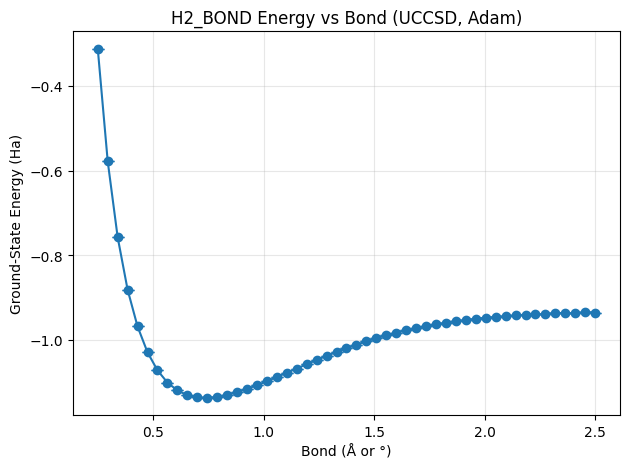

<Figure size 640x480 with 0 Axes>

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/H2_BOND_vqe_geometry_scan_ansUCCSD_optAdam_parambond.png
Minimum energy: -1.137100 ± 0.000000 at bond=0.745


In [8]:
results = run_vqe_geometry_scan(
    molecule="H2_BOND",          # uses the H₂ bond-length geometry helper
    param_name="bond",
    param_values=bond_lengths,
    ansatz_name="UCCSD",
    optimizer_name="Adam",
    steps=50,
    stepsize=0.2,
    seeds=[0],
    force=False,
    mapping="jordan_wigner",
    show=True,                   # display the package-generated plot
)

# 📌 Extract Approximate Equilibrium Bond Length

`run_vqe_geometry_scan` returns a list of tuples:

$$
(r, \langle E \rangle, \sigma_E)
$$

where:
- $r$ is the bond length
- $\langle E \rangle$ is the mean ground-state energy over seeds
- $\sigma_E$ is the standard deviation

In [9]:
# Unpack results into arrays
params, mean_E, std_E = zip(*results)
params = np.array(params, dtype=float)
mean_E = np.array(mean_E, dtype=float)
std_E = np.array(std_E, dtype=float)

# Find approximate minimum
min_idx = int(np.argmin(mean_E))
r_opt = params[min_idx]
E_opt = mean_E[min_idx]
dE_opt = std_E[min_idx]

print(f"\nEstimated equilibrium bond length (H–H): {r_opt:.5f} Å")
print(f"Minimum VQE ground-state energy: {E_opt:.8f} ± {dE_opt:.8f} Ha")


Estimated equilibrium bond length (H–H): 0.74500 Å
Minimum VQE ground-state energy: -1.13710037 ± 0.00000000 Ha


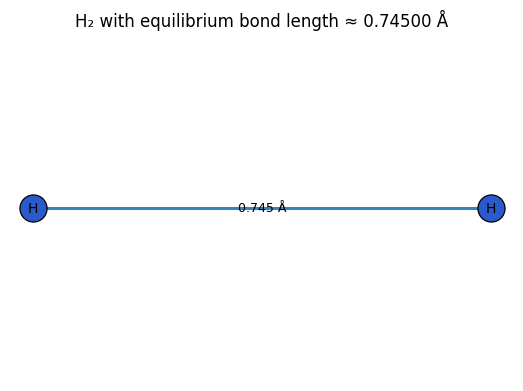

In [10]:
symbols = ["H", "H"]

coords = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 0.0, r_opt],
])

plot_molecule(
    symbols,
    coords,
    title=f"H₂ with equilibrium bond length ≈ {r_opt:.5f} Å",
    bonds=[(0, 1)],
    angles=[],
    show_bond_lengths=True,
    show_atom_indices=False,
)
plt.show()


---
## Summary

In this notebook you:

- Used the **production VQE API** (`run_vqe_geometry_scan`) as a pure client
- Performed a **noiseless UCCSD VQE** bond-length scan for **H₂**
- Obtained a **Ground-state energy vs bond length** curve
- Extracted an approximate **equilibrium bond length** from the VQE data

All ansatz construction, Hamiltonian generation, device management,
optimisation, caching, and plotting were handled by the package.